### Zomato Restaurant Project

By <b> Sajad Manaf<b>

<b>Problem Statement:<b>

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

<b>Data Storage:<b>
This problem statement contains two datasets- Zomato.csv and country_code.csv.

Country_code.csv contains two variables:
• Country code
    
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world 
    
• Restaurant Name: Name of the restaurant
    
• Country Code: Country in which restaurant is located
    
• City: City in which restaurant is located
    
• Address: Address of the restaurant
    
• Locality: Location in the city
    
• Locality Verbose: Detailed description of the locality
    
• Longitude: Longitude coordinate of the restaurants location
    
• Latitude: Latitude coordinate of the restaurants location
    
• Cuisines: Cuisines offered by the restaurant
    
• Average Cost for two: Cost for two people in different currencies
    
• Currency: Currency of the country
    
• Has Table booking: yes/no
    
• Has Online delivery: yes/ no
    
• Is delivering: yes/ no
    
• Switch to order menu: yes/no
    
• Price range: range of price of food
    
• Aggregate Rating: Average rating out of 5
    
• Rating color: depending upon the average rating color
    
• Rating text: text on the basis of rating of rating
    
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
    
1) Average Cost for two
    
2) Price range

In [1]:
# Library Import
import pandas as pd #  data wrangling 
import numpy as np # computation 
import seaborn as sns # Visualization 
import matplotlib.pyplot as plt # plot package
%matplotlib inline
import warnings # Filter warnings
warnings.filterwarnings('ignore')

#### Dataset Import, Data Wrangling, Data Cleaning

In [231]:
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='latin-1')

In [5]:
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
print('No of Rows in the Dataset:',df1.shape[0])
print('No of Columns in the Dataset: ',df1.shape[1])

No of Rows in the Dataset: 9551
No of Columns in the Dataset:  21


- in the problem statement there is mentioning about the another dataset, Country-Code.xlsx, lets import the second dataframe

In [232]:
df2= pd.read_excel(r'C:\Users\sajad\Downloads\Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [233]:
print('No of Rows in the Dataset2:',df2.shape[0])
print('No of Columns in the Dataset2: ',df2.shape[1])

No of Rows in the Dataset2: 15
No of Columns in the Dataset2:  2


- We have seen that in these two datasets country code is commmon, and using a lookup country code Country name can be indetified

<b>Now lets merge Df1 and Df2 using the field, Country Code to get the country name field rightly update<b>

In [234]:
df = pd.merge(df1,df2,on='Country Code',how='left')

In [20]:

pd.set_option('display.max_columns', None)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
df.shape

(9551, 22)

In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

- Target Variable 1 - Average Cost for two - is neumeric in nature - so Problem 1 is a Regression Problem
- Target Variable 2 - Price Range is seems a Classification Data item,lets find out more about this while checking the unique data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- No Null values as per info methods, however lets check the Nan count, special chaarcters check, duplicates etc

In [22]:
df.duplicated().sum()

0

- No duplicate Records

In [24]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [46]:
df.isin([' ','N/A','NA','-','?','NaN']).sum().any()

False

- No special Characters also

- Null Value Count

In [29]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

- No Null Values, except cuisines

<AxesSubplot:>

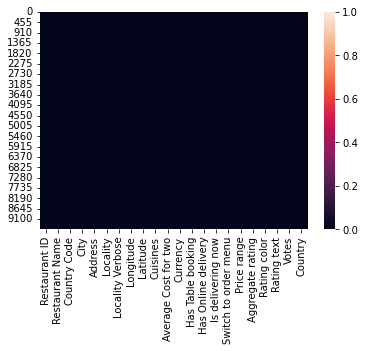

In [31]:
# visualising null values in dataset
sns.heatmap(df.isnull())

- It is found that feature Cuisines, are having some values showing as NaN, but not showing in the NaN Checks, but showing in Null check, for that we applied the datatype Cuisine to String

In [235]:
df['Cuisines']=df['Cuisines'].astype(str)

In [236]:
df.loc[df['Cuisines'] == 'nan']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,nan,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,nan,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,nan,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,nan,40,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,nan,40,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,nan,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,nan,40,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,nan,10,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,nan,10,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309,United States


In [53]:
df.iloc[84]

Restaurant ID                                     17284105
Restaurant Name                              Cookie Shoppe
Country Code                                           216
City                                                Albany
Address                 115 N Jackson St, Albany, GA 31701
Locality                                            Albany
Locality Verbose                            Albany, Albany
Longitude                                          -84.154
Latitude                                           31.5772
Cuisines                                               nan
Average Cost for two                                     0
Currency                                         Dollar($)
Has Table booking                                       No
Has Online delivery                                     No
Is delivering now                                       No
Switch to order menu                                    No
Price range                                             

- Lets Impute the Feature Cuisines to its mode

In [237]:
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [55]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

- All null values imputed

<b>Lets plot the Count and distribution of Independent Features<b>

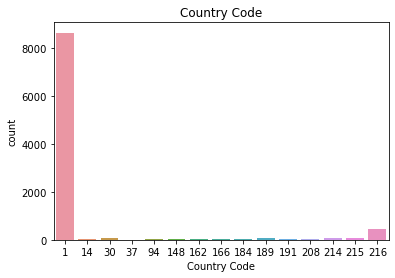

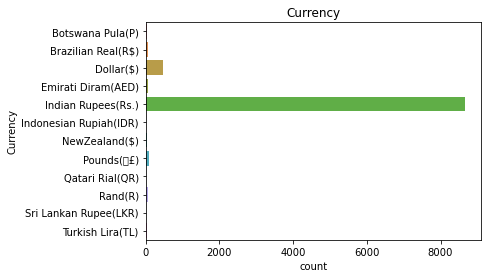

In [64]:

sns.countplot(x='Country Code',data=df)
plt.title('Country Code')
plt.show()

sns.countplot(y='Currency',data=df)
plt.title('Currency')
plt.show()

- Most of the Zomato Restaurants are in India and least USA, INR is the highest used Currency

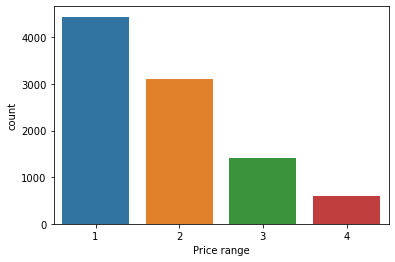

In [60]:
sns.countplot(x='Price range',data=df)
plt.show()

- Price Range 1 is high in player, and 4 is very least

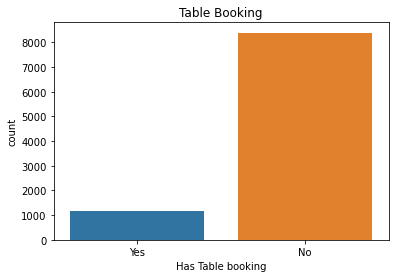

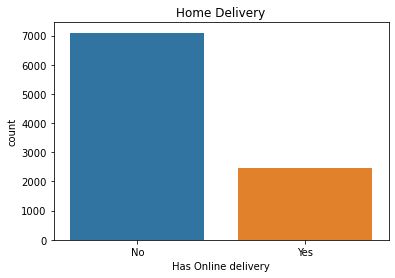

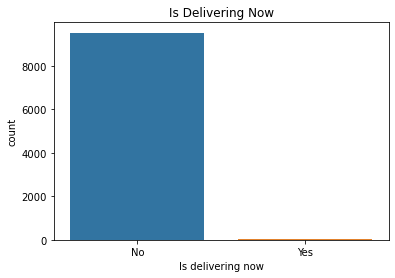

In [68]:
sns.countplot(x='Has Table booking',data=df)#
plt.title('Table Booking')
plt.show()

sns.countplot(x='Has Online delivery',data=df)
plt.title('Home Delivery')
plt.show()

sns.countplot(x='Is delivering now',data=df)
plt.title('Is Delivering Now')
plt.show()


- Most of the Hotels are having no Table bookings, no Online Delivery, no current Delivery options

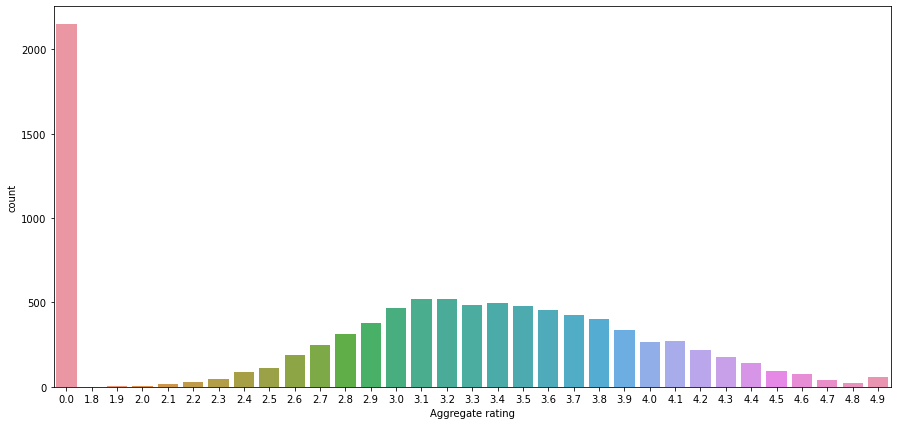

In [69]:
# Aggregate Rating

plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=df)
plt.show()

- More than 2000 restaurants are having rating as zero, Average rating value, falling between 3 and 4, max rating is 4.9

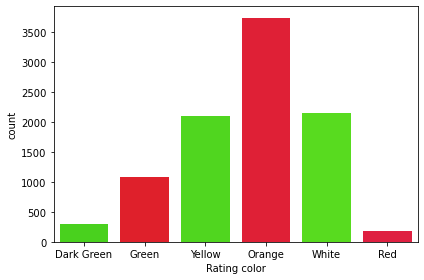

In [72]:
sns.countplot(x='Rating color',data=df)
plt.show()

- Orange is the highest rated colour, and Red is the least

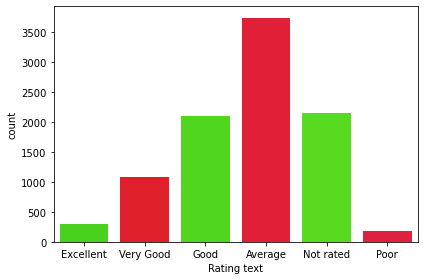

In [74]:
sns.countplot(x='Rating text',data=df)
plt.show()

- Average is the highest rated, and poor is the least

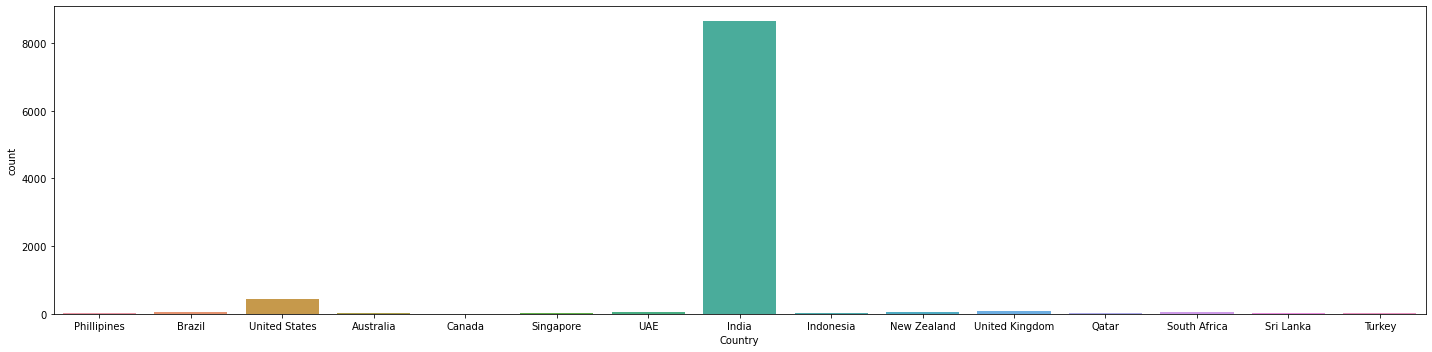

In [76]:
plt.figure(figsize=(20,5))
sns.countplot(x='Country',data=df)
plt.show()

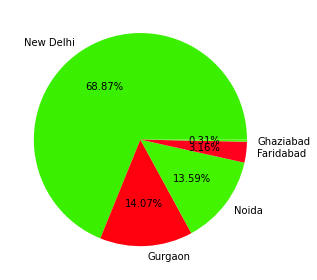

In [78]:
city_values = df.City.value_counts().values
city_labels = df.City.value_counts().index

plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')
plt.show()

- New Delhi is having the highest percenatge of restaurants in Zomato

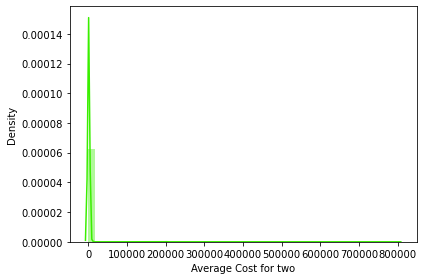

In [81]:
# Plotting Target Variable
sns.distplot(df['Average Cost for two'])
plt.show()

<b>Bi Variate Analysis<b>

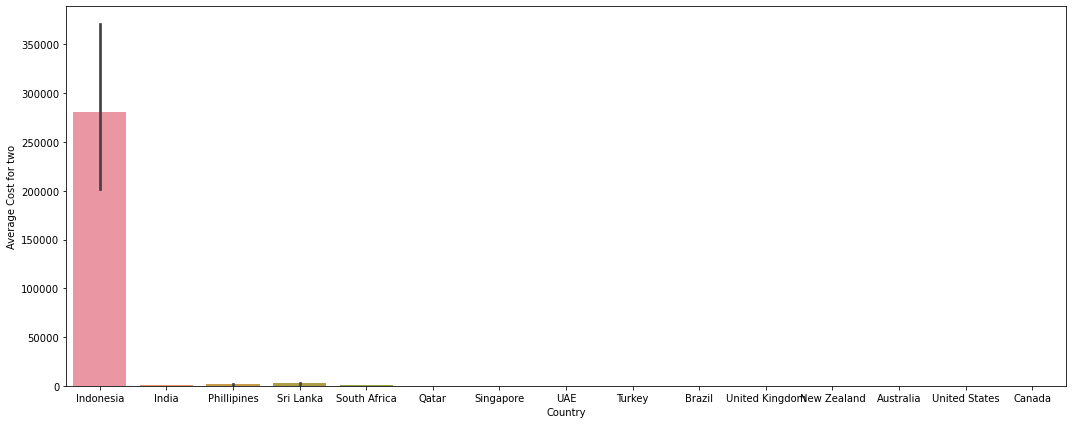

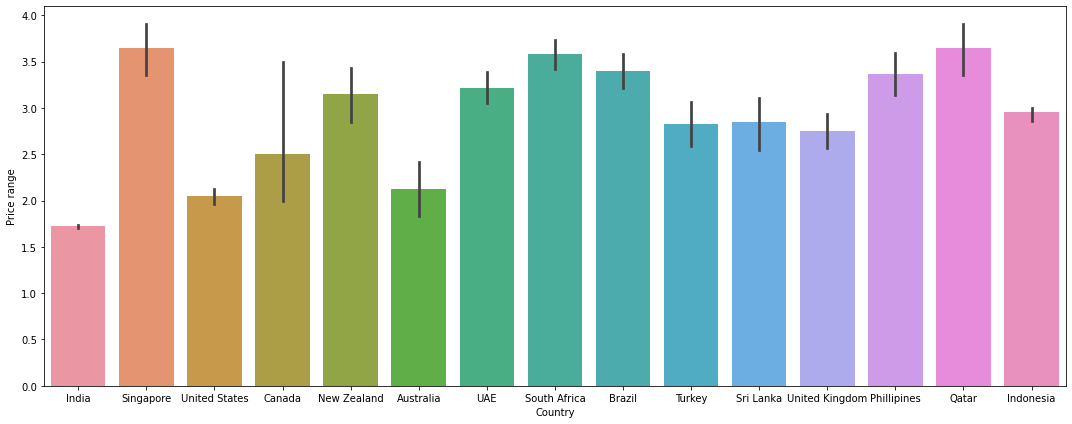

In [83]:
# Average Cost for Two
plt.figure(figsize=(15,6))
df_g = df.sort_values(by="Average Cost for two",ascending=False)
sns.barplot(x="Country",y="Average Cost for two",data=df_g)
plt.show()

# Price Range
plt.figure(figsize=(15,6))
df_g1 = df.sort_values(by="Price range",ascending=False)
sns.barplot(x="Country",y="Price range",data=df_g1)
plt.show()


- Average Price in high in Indonasia and rest all countries its minimal, which is due to currency value difference in various countries
- This seems to be possible outliers, which all will be treated I think
-For the Case of price range, Qatar, Singapore, South Africa, UAE are having high price ranges

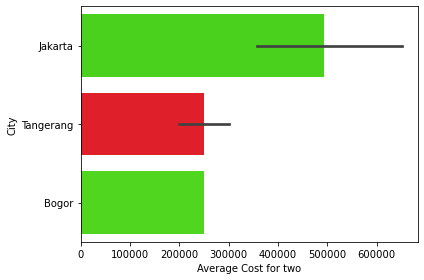

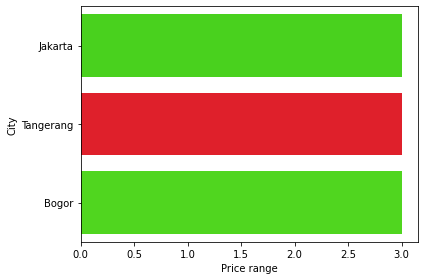

In [85]:
# Average Cost for Two V/s City
df_g2 = df.sort_values(by="Average Cost for two",ascending=False).iloc[0:10]
sns.barplot(y="City",x="Average Cost for two",data=df_g2)
plt.show()

#Price range v/s City

df_g3 = df.sort_values(by="Price range",ascending=False).iloc[0:10]
sns.barplot(y="City",x="Price range",data=df_g2)
plt.show()


- Price Range standing steady on various City, Average cost for two is high in Jakartha

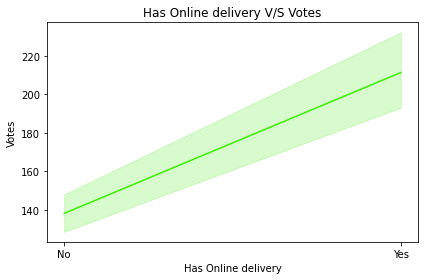

In [90]:
# Online delivery V/S Votes
sns.lineplot(x='Has Online delivery',y='Votes',data=df)
plt.title('Has Online delivery V/S Votes')
plt.show() 

- more Votes gained for Has Online delivery 

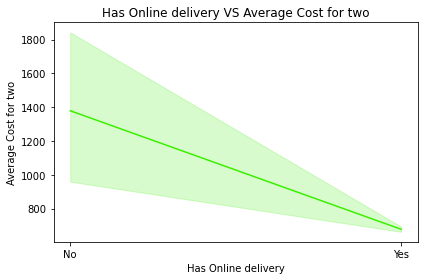

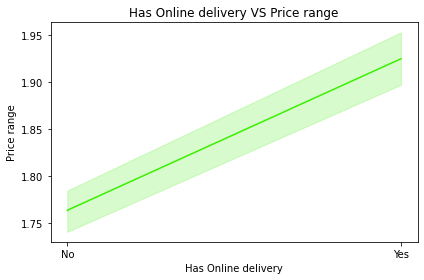

In [92]:

# Has Online delivery VS Average Cost for two
sns.lineplot(x='Has Online delivery',y='Average Cost for two',data=df)
plt.title('Has Online delivery VS Average Cost for two')
plt.show()

sns.lineplot(x='Has Online delivery',y='Price range',data=df)
plt.title('Has Online delivery VS Price range')
plt.show()


- Average Cost still high for no Online deli very fascility restaurants, so this is not a factor in deciding average cost
- but Price range is having a different relationship which is range is high for onlinme delivery yes cases

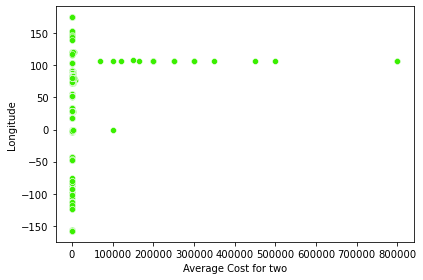

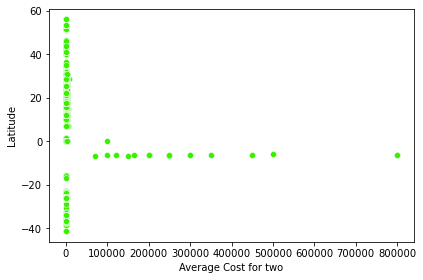

In [95]:
sns.scatterplot(x='Average Cost for two',y='Longitude',data=df)
plt.show()

sns.scatterplot(x='Average Cost for two',y='Latitude',data=df)
plt.show()

- No Relationship of LOngitude and Latitude with TTarget Variable 1- Average Cost for two

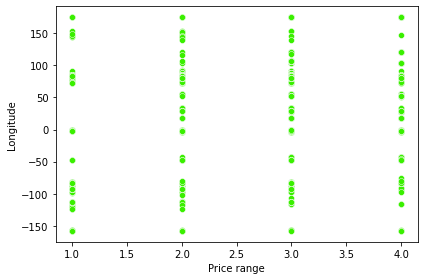

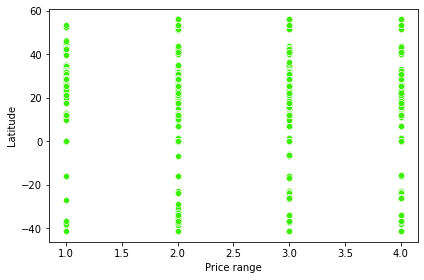

In [97]:
sns.scatterplot(x='Price range',y='Longitude',data=df)
plt.show()

sns.scatterplot(x='Price range',y='Latitude',data=df)
plt.show()

- Lngitude and Latitude are having no relationship with both the Target variables, so all these can be deleted

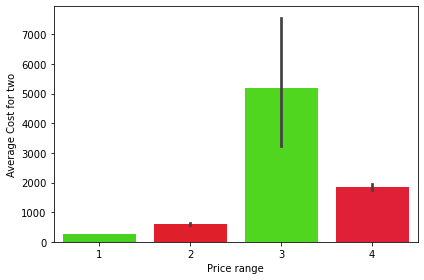

In [99]:
sns.barplot(x='Price range',y='Average Cost for two',data=df)
plt.show()

- Price Range 3 has the highest Average Cost, and least for 1

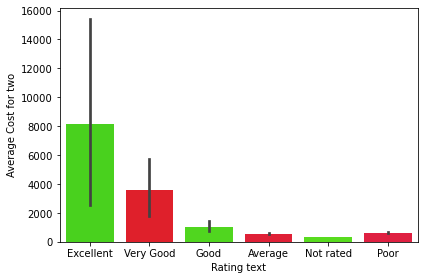

In [101]:
sns.barplot(x='Rating text',y='Average Cost for two',data=df)
plt.show()

- High rated restaurants are having high Average Cost also

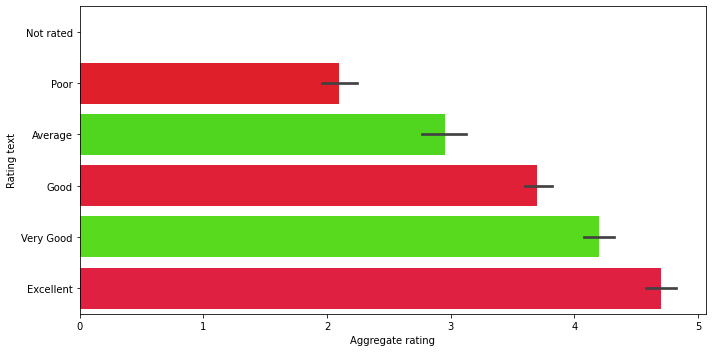

In [103]:
rating=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating count'})
plt.figure(figsize=(10,5))
sns.barplot(x='Aggregate rating',y='Rating text',data=rating)
plt.show()

In [105]:
# Zero rating Check
dfn=df
dfn[dfn['Rating color']=='White'].groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


- Zero rating found for most of Indian Restaurants, Assuming the food quality is bad, and this rating is a honest one

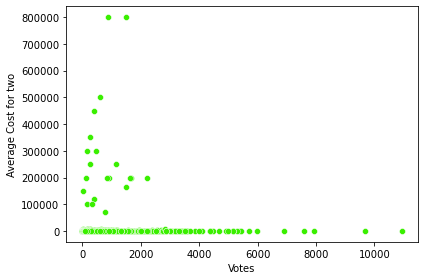

In [107]:
sns.scatterplot(x='Votes',y='Average Cost for two',data=df)
plt.show()

- No steady linear relationship, but upto 2000 votes seems a strady lienar relationship

<b>Multi Variate Analysis<b>

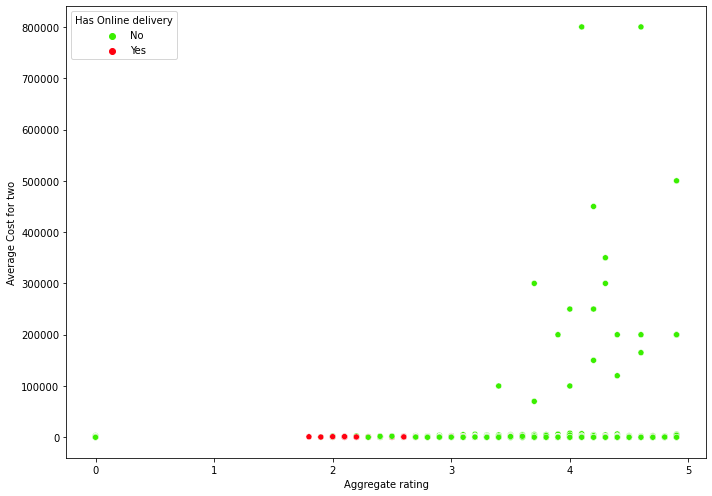

In [109]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Aggregate rating',y='Average Cost for two',hue='Has Online delivery',data=df)
plt.show()

- No Online Order accepted restuarants are also having good orders, ratings also, only a few accepting online orders

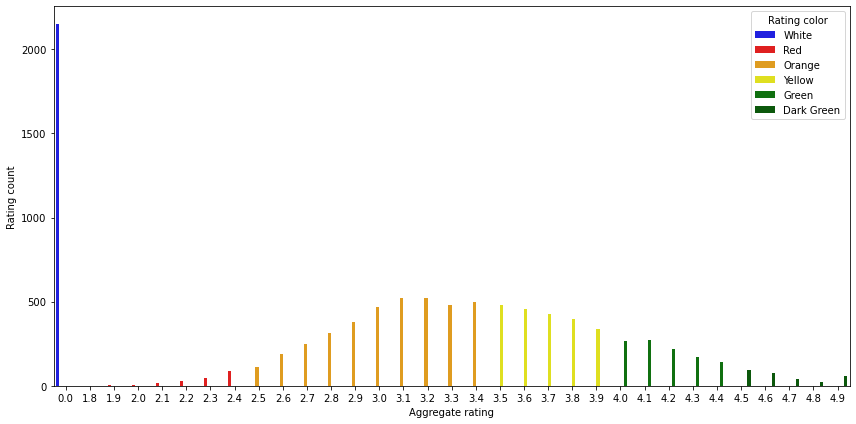

In [110]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating count',hue='Rating color',data=rating, palette=['blue','red','orange','yellow','green','darkgreen'])
plt.show()

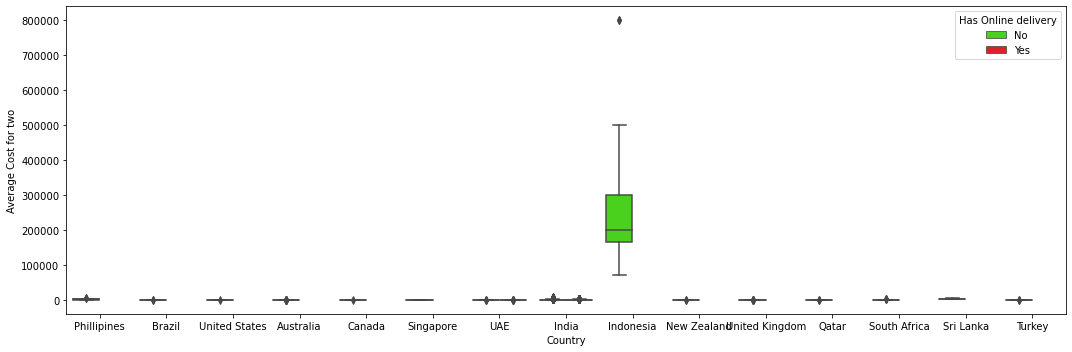

In [111]:
plt.figure(figsize=(15,5))
sns.boxplot(x="Country", y="Average Cost for two", hue="Has Online delivery",data=df)
plt.show()

- can see, Indonesia has high average cost for two and they also not available of online delivery. this might also due to currency valuation

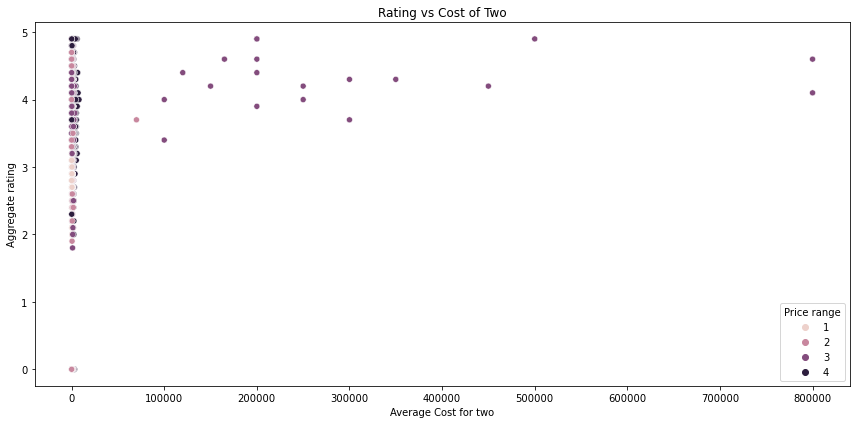

In [114]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=df)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two')
plt.show()

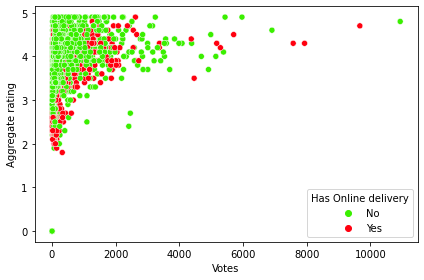

In [115]:
sns.scatterplot(x='Votes',y='Aggregate rating',data=df,hue='Has Online delivery')
plt.show()

<b> Outliers TReatment<b>

In [238]:
#Dropping unnecessary Fetures
# 'Restaurant ID','Locality Verbose', 'Restaurant Name','Address', 'Locality','Cuisines' - we found that these features are having no contributions in predicting the outcome

df1=df.drop(columns=['Restaurant ID','Locality Verbose', 'Restaurant Name','Address', 'Locality','Cuisines'],axis=1,inplace=True)

In [239]:
df.shape

(9551, 16)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Longitude             9551 non-null   float64
 3   Latitude              9551 non-null   float64
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   object 
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Is delivering now     9551 non-null   object 
 9   Switch to order menu  9551 non-null   object 
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   object 
 13  Rating text           9551 non-null   object 
 14  Votes                 9551 non-null   int64  
 15  Country              

In [240]:
#splitting Object and Neumeric Data
Categorical =['City','Currency','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text','Country']
Neumerical = ['Country Code','Latitude','Longitude','Average Cost for two','Price range','Aggregate rating','Votes']    

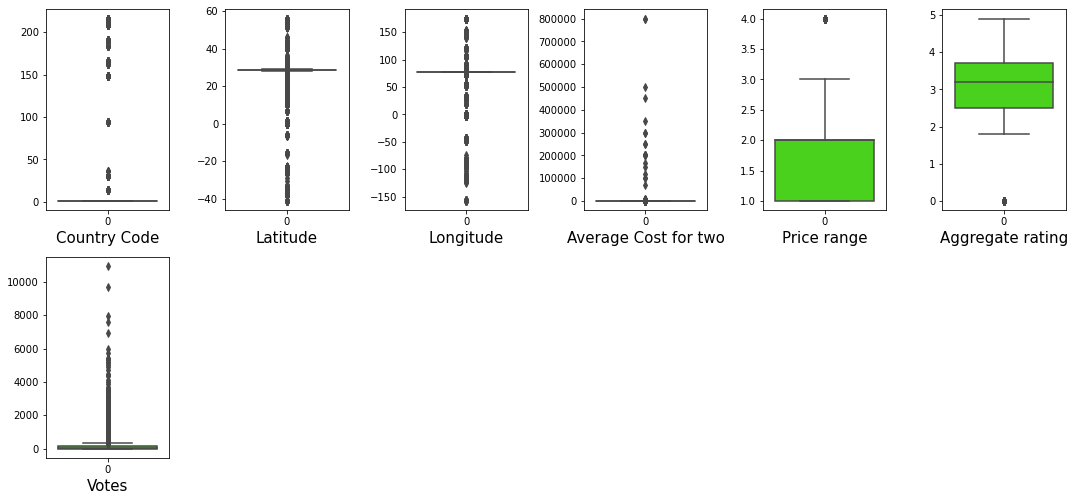

In [141]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in Neumerical:
    if plotnumber<=17:
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(data= df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

- Many OUtliers in Country Code, Latitude, Longitude, Average Cost for Two, and for votes also

<b> Encoding Categorical features<b>

In [241]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[Categorical]= df[Categorical].apply(le.fit_transform)
df

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,73,121.027535,14.565443,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,162,73,121.014101,14.553708,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,162,75,121.056831,14.581404,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,162,75,121.056475,14.585318,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,162,75,121.057508,14.584450,1500,0,1,0,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,140,28.977392,41.022793,80,11,0,0,0,0,3,4.1,1,5,788,11
9547,208,140,29.041297,41.009847,105,11,0,0,0,0,3,4.2,1,5,1034,11
9548,208,140,29.034640,41.055817,170,11,0,0,0,0,4,3.7,5,2,661,11
9549,208,140,29.036019,41.057979,120,11,0,0,0,0,4,4.0,1,5,901,11


<b>Correlation Check<b>

In [242]:
corr =df.corr()
corr

,Country Code,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,-0.181728,-0.698299,0.019792,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
City,-0.181728,1.000000,0.117391,-0.004301,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.098985,-0.078406,-0.180959
Longitude,-0.698299,0.117391,1.000000,0.043207,0.045891,0.337334,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,0.019792,-0.004301,0.043207,1.000000,-0.111088,-0.101864,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Average Cost for two,0.043225,-0.028838,0.045891,-0.111088,1.000000,0.045615,0.007758,-0.018974,-0.001862,NaN,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Currency,-0.033466,-0.071996,0.337334,-0.101864,0.045615,1.000000,0.000640,0.006991,0.001458,NaN,0.075179,-0.006939,-0.040430,0.014598,-0.027111,-0.105296
Has Table booking,-0.061682,-0.003762,0.100488,0.054658,0.007758,0.000640,1.000000,0.101224,-0.016816,NaN,0.501925,0.189998,-0.021365,0.044043,0.169422,-0.062076
Has Online delivery,-0.154605,0.012723,0.178757,0.118722,-0.018974,0.006991,0.101224,1.000000,0.101730,NaN,0.077918,0.225699,0.011477,-0.080937,0.074303,-0.140464
Is delivering now,-0.018291,-0.014039,0.018787,0.015001,-0.001862,0.001458,-0.016816,0.101730,1.000000,NaN,0.010940,0.019180,0.001886,-0.031970,-0.001124,-0.016607
Switch to order menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
df.drop('Switch to order menu', axis=1, inplace=True)

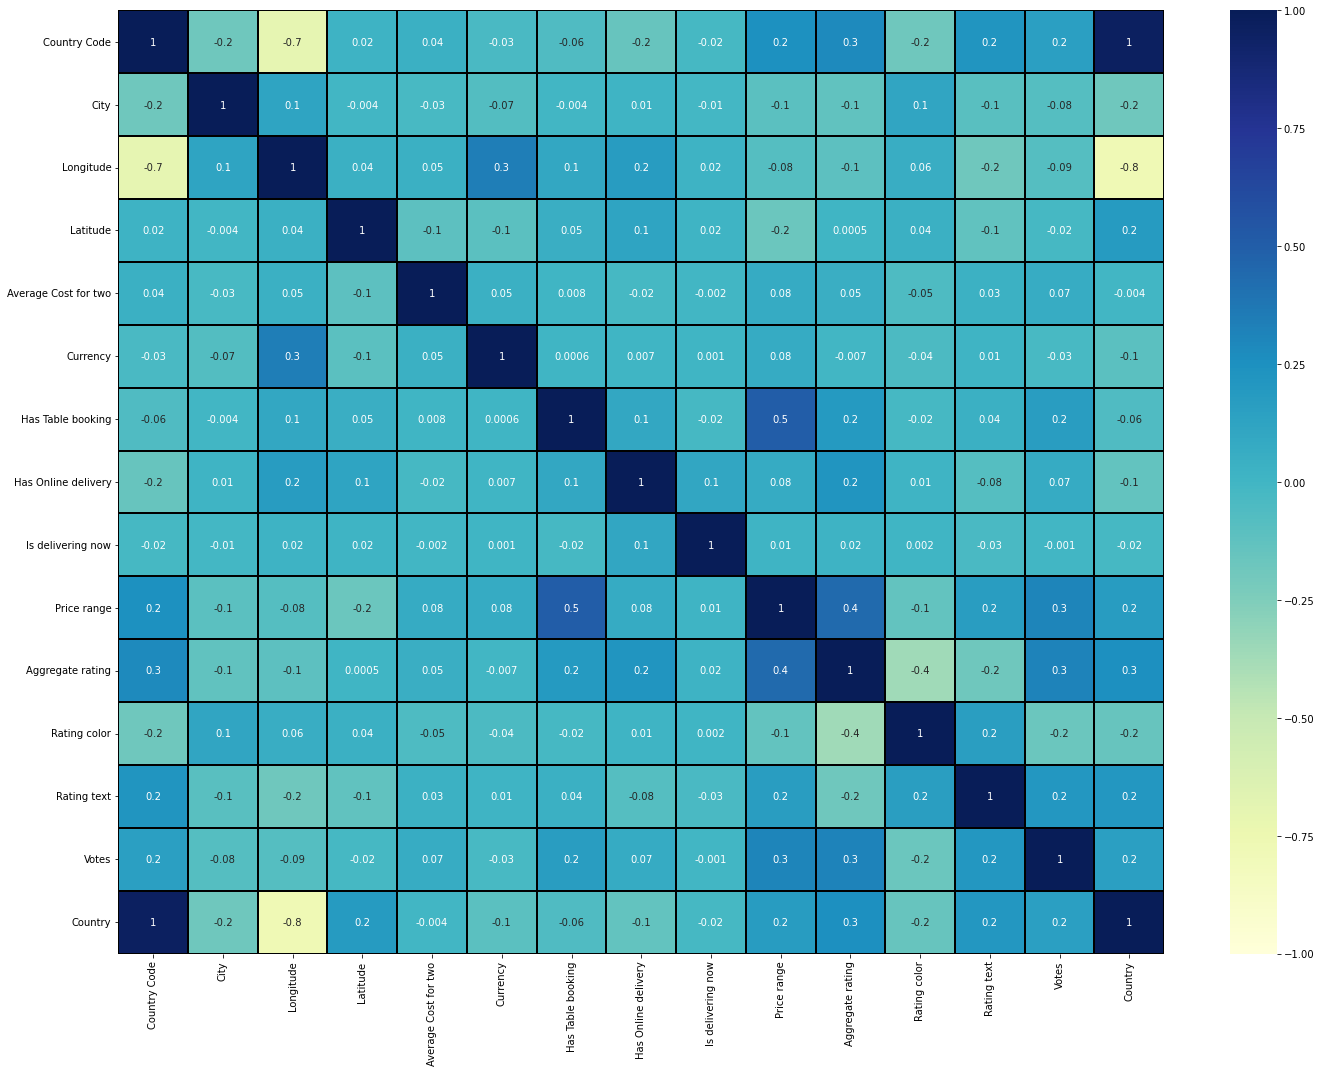

In [244]:
#Ploting Correlation using heatmap
plt.figure(figsize=(20,15))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

- Switch to order menu has only one value = N, this can be deleted,

- high correlation between Longitude and Country, Longitude and Country Code

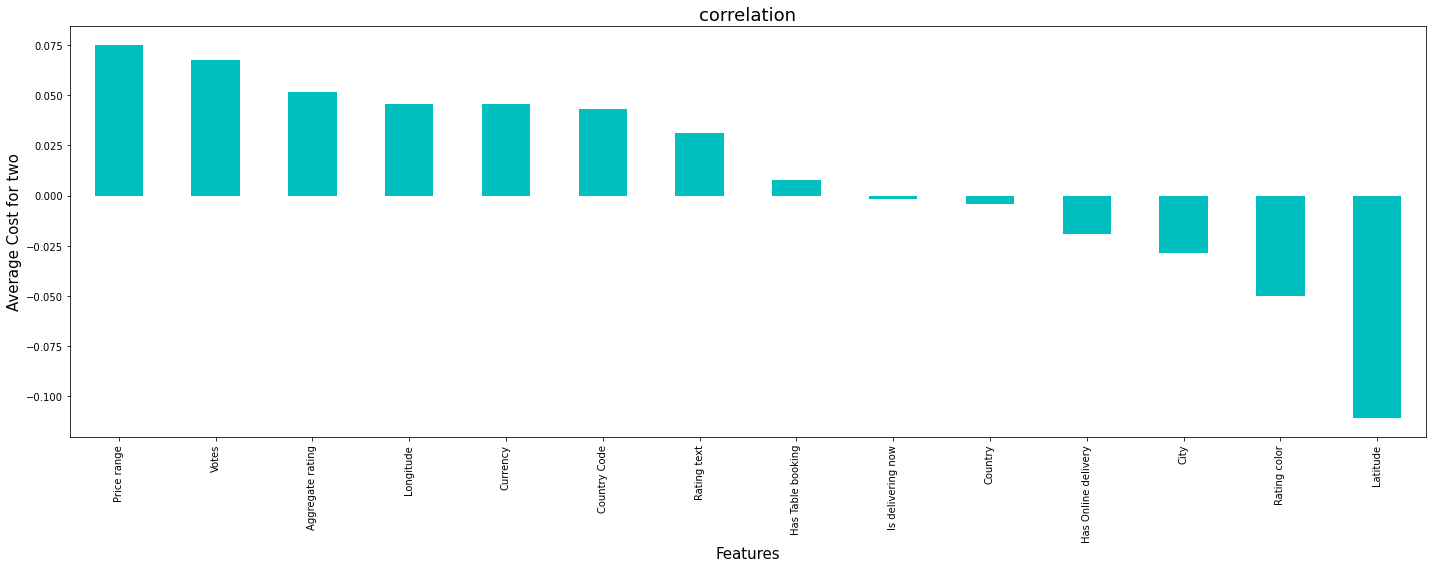

In [149]:
# Correlation in Order
plt.figure(figsize = (20,8))
df.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

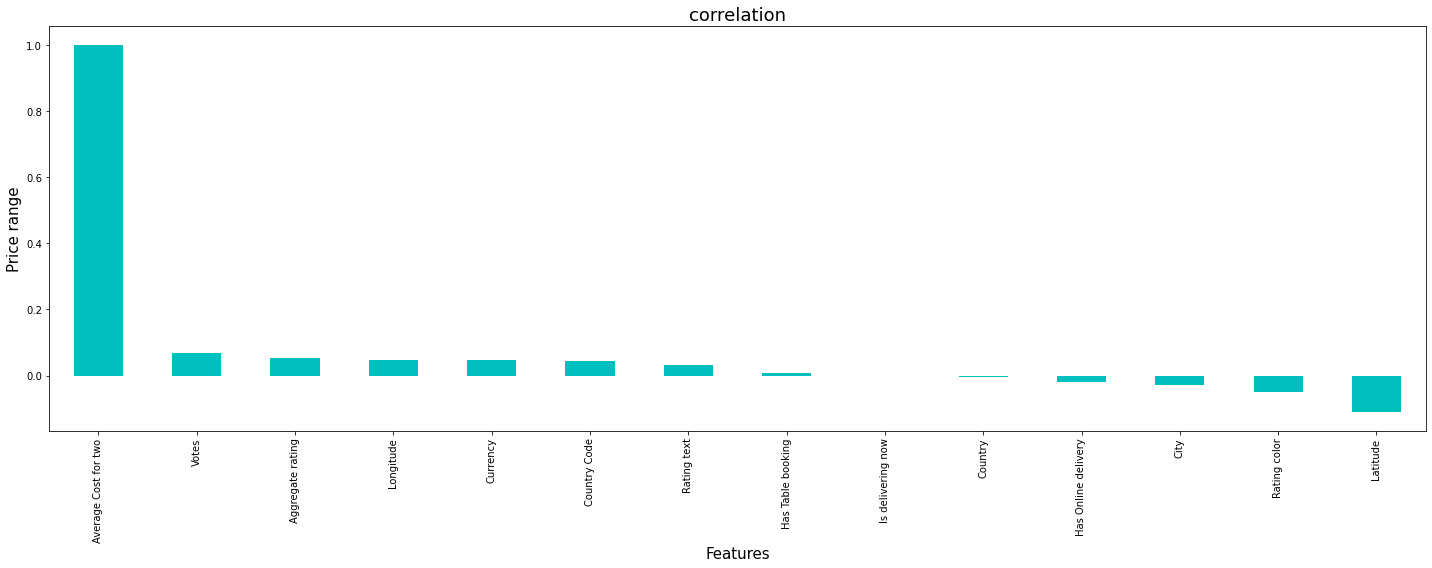

In [245]:
# Correlation in Order
plt.figure(figsize = (20,8))
df.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Price range']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Price range',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- Average Cost of two has a high correlation with Price range

#### Distribution Of Data

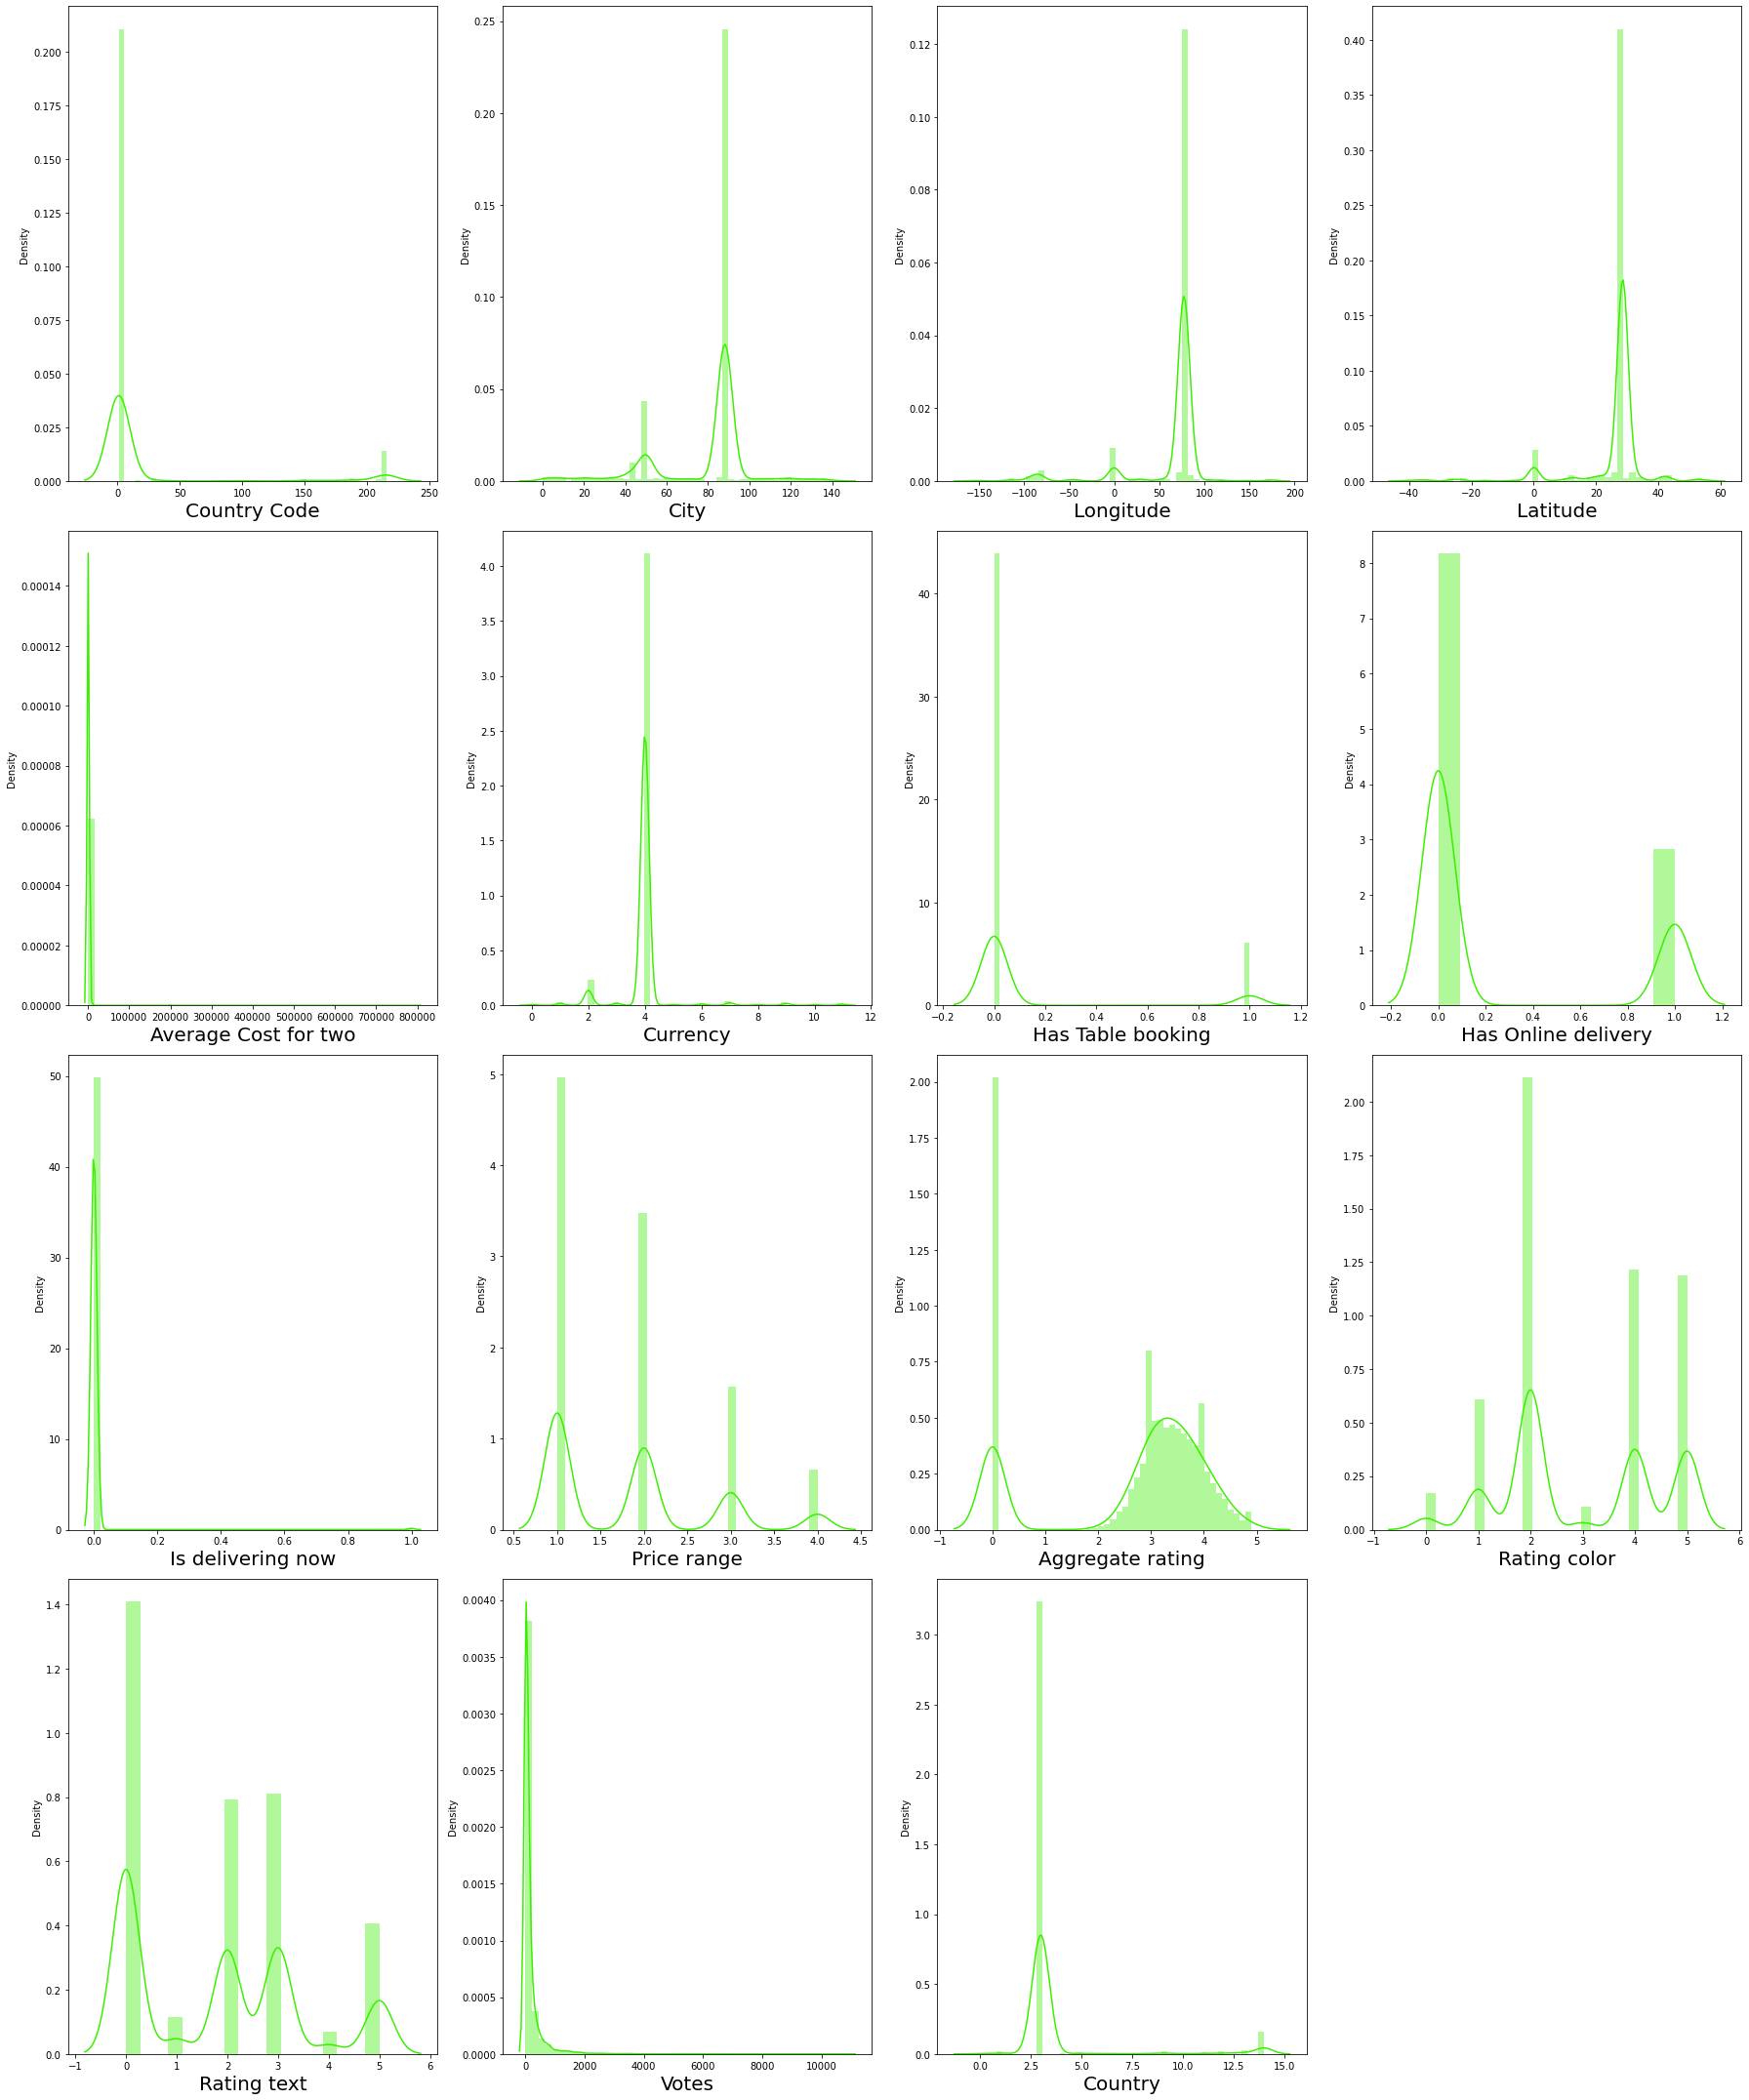

In [153]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
    if plotnumber <=15:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

<b>Skewness Check<b>

In [246]:
df.skew()

Country Code             3.043965
City                    -1.193777
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

- Almost all features are having skewness

<b>Outlier Removal and Skewness reduction using Zscore<b>

In [247]:
from scipy.stats import zscore

z_score = zscore(df[['Average Cost for two','Votes']]) # Only removing outliers from continuous data
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = df[filtering_entry]

<b>Checking the Skewness again<b>

In [158]:
df.shape

(9362, 15)

In [161]:
#percentage data loss

print(((9551 - 9352)/9551)*100)

2.0835514605800443


- data loss is okay and we can proceed further

In [248]:
df.skew()

Country Code             3.073330
City                    -1.208515
Longitude               -2.804979
Latitude                -3.124155
Average Cost for two     3.619524
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Price range              0.933571
Aggregate rating        -0.940907
Rating color             0.047268
Rating text              0.434638
Votes                    3.216882
Country                  3.326986
dtype: float64

In [163]:
# lets try reducing the skewness of 'Average Cost for two','Votes' further by log transformation

In [249]:
df["Votes"] = np.log1p(df["Votes"])

- Still skewnwss present

In [250]:
df.skew()

Country Code             3.073330
City                    -1.208515
Longitude               -2.804979
Latitude                -3.124155
Average Cost for two     3.619524
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Price range              0.933571
Aggregate rating        -0.940907
Rating color             0.047268
Rating text              0.434638
Votes                   -0.121822
Country                  3.326986
dtype: float64

- Skewness reduced, except for the  target variable

<b>Multi Colinearity Check<b>

In [251]:
x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

In [252]:
from sklearn.preprocessing import StandardScaler

In [253]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [255]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Country Code,48.442142
1,City,1.069689
2,Longitude,5.084836
3,Latitude,3.020868
4,Currency,1.287821
5,Has Table booking,1.475081
6,Has Online delivery,1.226178
7,Is delivering now,1.013212
8,Price range,1.990175
9,Aggregate rating,5.122666


VIF is high for Country code, Country, lets drop the two features

In [256]:
df.drop(columns=['Country Code','Country'],axis=1,inplace=True)

<b>Slecting K best features<b>

In [174]:
from sklearn.feature_selection import SelectKBest, f_classif

x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

In [175]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [176]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

                Feature       Score
7           Price range  418.202989
1             Longitude  142.353602
4     Has Table booking   80.635590
11                Votes   38.788776
3              Currency   29.041295
8      Aggregate rating   22.275744
2              Latitude   15.805349
5   Has Online delivery   11.752010
10          Rating text    7.144425
0                  City    4.863372
9          Rating color    4.044857
6     Is delivering now    2.063234


In [257]:
df.skew()

City                    -1.208515
Longitude               -2.804979
Latitude                -3.124155
Average Cost for two     3.619524
Currency                 2.885278
Has Table booking        2.382516
Has Online delivery      1.120081
Is delivering now       16.505874
Price range              0.933571
Aggregate rating        -0.940907
Rating color             0.047268
Rating text              0.434638
Votes                   -0.121822
dtype: float64

In [258]:
x = scaler.fit_transform(x)

In [259]:
X = df.drop(columns=['Average Cost for two'],axis=1)
Y = df['Average Cost for two']

## ML Algorithm Building

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=44, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6553, 12)
Training target vector size: (6553,)
Test feature matrix size: (2809, 12)
Test target vector size: (2809,)


#### Finding the Best Random State

In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.648039446461149 on Random_state 857


#### LR Base Model 

In [262]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=857, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Costs:',y_pred)
print('\n')
print('Actual Costs:',Y_test)

Predicted Costs: [ 300.53833815  259.57957234 -115.95114068 ...  260.7361049   663.53098858
  668.32239534]


Actual Costs: 2014     400
7112     350
2264     200
3238    1200
4185     600
        ... 
4442     800
3942     350
8286     300
2162     650
6431     900
Name: Average Cost for two, Length: 2809, dtype: int64


In [263]:
#### LR Evaluation Matrix

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 193.4887839852928
Mean squared error : 112249.90833860585
Root Mean Squared Error: 335.0371745621758


 R2 Score :
0.648039446461149


#### Cross Validation

In [264]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.22985333021020954


#### Applying Other Regression Models

In [265]:
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor
rf = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 



 Error of  RandomForestRegressor(max_depth=25, n_estimators=70) :
Mean absolute error : 112.104562281719
Mean squared error : 41662.27504259429
Root Mean Squared Error: 204.11338771034664


 R2 Score :
0.8693675780879353


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 193.48864968952455
Mean squared error : 112249.99439855907
Root Mean Squared Error: 335.03730299559044


 R2 Score :
0.6480391766194251


 Error of  DecisionTreeRegressor() :
Mean absolute error : 143.36446077951953
Mean squared error : 87536.49563861417
Root Mean Squared Error: 295.8656716123284


 R2 Score :
0.7255285646480866


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 168.03084916906417
Mean squared error : 77669.81808866923
Root Mean Squared Error: 278.69305353501227


 R2 Score :
0.7564656170115728


 Error of  GradientBoostingRegressor(max_depth=25) :
Mean absolute error : 136.04098793533095
Mean squared error : 83843.66876885551
Root Mean Squared Error: 289.5577123283984


 R

- Random Forest Algorithm gives highet R2 Score  - 0.8693675780879353

In [266]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X, Y, cv =20)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor(max_depth=25, n_estimators=70) :

Mean CV Score : 0.603082081860264


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.20125152831819007


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.25304813808448035


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.5270567692062456


Cross Validation Score : GradientBoostingRegressor(max_depth=25) :

Mean CV Score : 0.4027107860736443


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max

<b>Hyper Parameter Tuning : GridSearchCV<b>

In [267]:
from sklearn.model_selection import GridSearchCV

In [268]:
from sklearn.ensemble import RandomForestRegressor


In [269]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],'criterion':['mse','mae'],
             'max_features':["auto","sqrt","log2"]}

In [270]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 3)

In [271]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=3)

In [272]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 60}

#### Final Regression Model

In [273]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=60 ,criterion = 'mse', max_depth= 40, max_features = 'auto',
             min_samples_leaf = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 111.8869131662243
Mean squared error : 40424.89439455133
Root Mean Squared Error: 201.05943000653147


 R2 Score of Final Model :
0.8732473957578949




#### Final R2 Score is 0.873247

 True Values Vs Predicted Value plot :


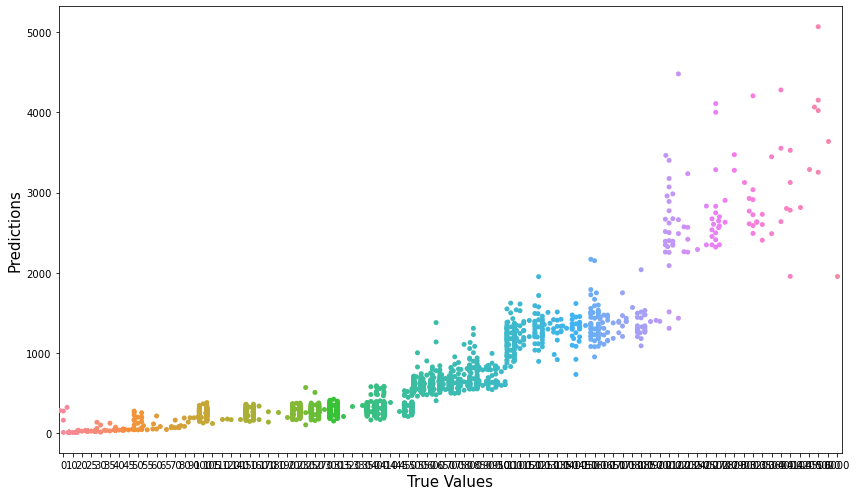

In [274]:
# Final Model plot
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

##### Model Export

In [205]:
import pickle
pickle.dump(Final_mod, open('Zomato_AverageCostForTwo','wb'))

#### Classification Problem

In [206]:
df.head()

,City,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,73,121.027535,14.565443,7.003974,0,1,0,0,3,4.8,0,1,5.752573
1,73,121.014101,14.553708,7.090910,0,1,0,0,3,4.5,0,1,6.383507
2,75,121.056831,14.581404,8.294300,0,1,0,0,4,4.4,1,5,5.602119
3,75,121.056475,14.585318,7.313887,0,0,0,0,4,4.9,0,1,5.902633
4,75,121.057508,14.584450,7.313887,0,1,0,0,4,4.8,0,1,5.438079


#### Multi Coliearity Check

In [207]:
X = df.drop(columns=['Price range'],axis=1)
Y = df['Price range']

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [210]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [212]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,City,1.064568
1,Longitude,1.329818
2,Latitude,1.111181
3,Average Cost for two,1.181591
4,Currency,1.440654
5,Has Table booking,1.202848
6,Has Online delivery,1.013178
7,Is delivering now,1.892114
8,Aggregate rating,5.028039
9,Rating color,1.213489


- No MultiColinearity Present

#### Model Building

In [213]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6553, 12)
Training target vector size: (6553,)
Test feature matrix size: (2809, 12)
Test target vector size: (2809,)


In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.663937344250623 on Random_state 65


In [215]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=65, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.663937344250623


Confusion matrix of Logistics Regression : 
 [[1152  187   27    2]
 [ 295  533   70    9]
 [  49  155  161   17]
 [  22   65   46   19]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       0.76      0.84      0.80      1368
           2       0.57      0.59      0.58       907
           3       0.53      0.42      0.47       382
           4       0.40      0.12      0.19       152

    accuracy                           0.66      2809
   macro avg       0.56      0.49      0.51      2809
weighted avg       0.65      0.66      0.65      2809



#### Optimum Value for KNN

In [216]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3894295743500055
RMSE value for k=  2 is: 0.41893591153159465
RMSE value for k=  3 is: 0.4331411427641131
RMSE value for k=  4 is: 0.4464965874037446
RMSE value for k=  5 is: 0.4571336392296497
RMSE value for k=  6 is: 0.4640895802358054
RMSE value for k=  7 is: 0.46255285555212317
RMSE value for k=  8 is: 0.45635421216784244
RMSE value for k=  9 is: 0.46828957154682477
RMSE value for k=  10 is: 0.475456723334119
RMSE value for k=  11 is: 0.49201527586435084
RMSE value for k=  12 is: 0.49741231420619125
RMSE value for k=  13 is: 0.5055758870556325
RMSE value for k=  14 is: 0.4941811642908979
RMSE value for k=  15 is: 0.5076839263046683
RMSE value for k=  16 is: 0.5055758870556325
RMSE value for k=  17 is: 0.500622609864966
RMSE value for k=  18 is: 0.506279542075424
RMSE value for k=  19 is: 0.5052236920375806
RMSE value for k=  20 is: 0.5013332171919405
RMSE value for k=  21 is: 0.4977700361612422
RMSE value for k=  22 is: 0.5034590212877862
RMSE value for k

K= 1 has minimum RMSE value,and seen shooting up

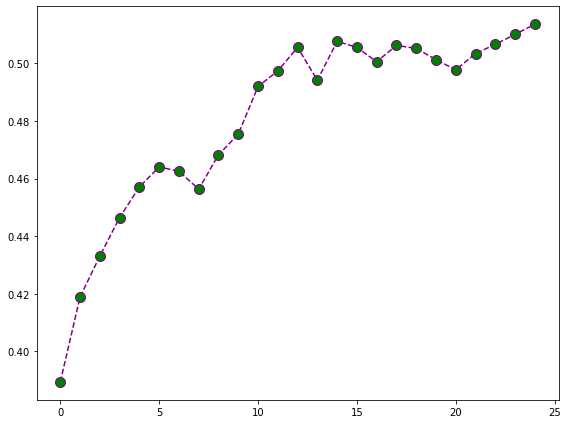

In [217]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='purple', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

Min RMSE at K=1 which is 0.3894295743500055

In [221]:
from sklearn.metrics import plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.574937700249199


Confusion matrix : 
 [[1249  117    1    1]
 [ 556  329   17    5]
 [  73  276   19   14]
 [  23   99   12   18]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.66      0.91      0.76      1368
           2       0.40      0.36      0.38       907
           3       0.39      0.05      0.09       382
           4       0.47      0.12      0.19       152

    accuracy                           0.57      2809
   macro avg       0.48      0.36      0.36      2809
weighted avg       0.53      0.57      0.52      2809



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.5428978284086864


Confusion matrix : 
 [[1288    3    0   77]
 [ 685   30   43  149]
 [  65   15   81  221]
 [   9    3   14  126]]


Classification Report : 
               precision    recall  f1-score   support

           1       0.63   

<b>DecisionTreeClassifier is giving the highest accuracy score which is 98.22%<b>

#### Cross Validation Score

In [222]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.25947678 0.66470902 0.61858974 0.63568376 0.60416667]
Mean Score : 0.5565251938249802
Std deviation : 0.14988615737060104




Cross Validation Score SVC() :

Score : [0.34490123 0.53497064 0.50801282 0.52190171 0.55769231]
Mean Score : 0.4934957401855426
Std deviation : 0.0760780388483634




Cross Validation Score GaussianNB() :

Score : [0.24719701 0.53176722 0.56730769 0.56784188 0.54220085]
Mean Score : 0.4912629311721677
Std deviation : 0.12284183676082412




Cross Validation Score DecisionTreeClassifier() :

Score : [0.36412173 0.95088094 0.99305556 0.99839744 0.84615385]
Mean Score : 0.8305219014241972
Std deviation : 0.23952417816669586




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.29845168 0.71062467 0.89636752 0.9017094  0.76602564]
Mean Score : 0.7146357824414418
Std deviation : 0.22085704707290657




Cross Validation Score RandomForestClassifier() :

Score : [0.45435131 0.95782168 0

####Hyper Parameter Tuning GridSearchCV

In [224]:
from sklearn.model_selection import GridSearchCV

In [225]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [226]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.894 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.889 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.886 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.876 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [227]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

In [229]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 70, max_depth=60 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9697401210395158


In [230]:
#####  Saving Model Rain Prediction Classification - Will Rain Tomorrow?

import joblib
joblib.dump(Final_mod,'Zomato_Classification.pkl')

['Zomato_Classification.pkl']